<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Part-I---Clean-&amp;-Combine-Raw-Data" data-toc-modified-id="Part-I---Clean-&amp;-Combine-Raw-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Part I - Clean &amp; Combine Raw Data</a></span><ul class="toc-item"><li><span><a href="#Ads-&amp;-Vouchers" data-toc-modified-id="Ads-&amp;-Vouchers-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Ads &amp; Vouchers</a></span></li><li><span><a href="#Campaign-&amp;-CFS" data-toc-modified-id="Campaign-&amp;-CFS-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Campaign &amp; CFS</a></span></li><li><span><a href="#Listing-&amp;-shops" data-toc-modified-id="Listing-&amp;-shops-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Listing &amp; shops</a></span></li><li><span><a href="#Ops-&amp;-GP" data-toc-modified-id="Ops-&amp;-GP-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Ops &amp; GP</a></span></li><li><span><a href="#Revies-&amp;-Respond" data-toc-modified-id="Revies-&amp;-Respond-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Revies &amp; Respond</a></span></li></ul></li><li><span><a href="#Part-II---Check-&amp;-Deep-Clean" data-toc-modified-id="Part-II---Check-&amp;-Deep-Clean-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Part II - Check &amp; Deep Clean</a></span><ul class="toc-item"><li><span><a href="#Reset-Columns" data-toc-modified-id="Reset-Columns-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Reset Columns</a></span></li><li><span><a href="#Change-Main-Category-to-Number" data-toc-modified-id="Change-Main-Category-to-Number-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Change Main Category to Number</a></span></li><li><span><a href="#Convert-All-Data-to-Float" data-toc-modified-id="Convert-All-Data-to-Float-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Convert All Data to Float</a></span></li><li><span><a href="#Save-Combined-Raw-Data" data-toc-modified-id="Save-Combined-Raw-Data-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Save Combined Raw Data</a></span></li></ul></li><li><span><a href="#Part-III---Normalization-(Z-Score)" data-toc-modified-id="Part-III---Normalization-(Z-Score)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Part III - Normalization (Z-Score)</a></span><ul class="toc-item"><li><span><a href="#Show-All-Features" data-toc-modified-id="Show-All-Features-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Show All Features</a></span></li><li><span><a href="#Z-Score-Normalization" data-toc-modified-id="Z-Score-Normalization-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Z-Score Normalization</a></span></li><li><span><a href="#Save-Normalized-Data-Set" data-toc-modified-id="Save-Normalized-Data-Set-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Save Normalized Data Set</a></span></li></ul></li><li><span><a href="#Part-IV---Normalization-(min-max)" data-toc-modified-id="Part-IV---Normalization-(min-max)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Part IV - Normalization (min max)</a></span></li><li><span><a href="#Part-V---Data-Visualization---ZScore" data-toc-modified-id="Part-V---Data-Visualization---ZScore-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Part V - Data Visualization - ZScore</a></span><ul class="toc-item"><li><span><a href="#Correlation-Heat-Map" data-toc-modified-id="Correlation-Heat-Map-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Correlation Heat Map</a></span></li><li><span><a href="#Scatter" data-toc-modified-id="Scatter-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Scatter</a></span></li></ul></li><li><span><a href="#Part-VI---Data-Visualization---MinMax" data-toc-modified-id="Part-VI---Data-Visualization---MinMax-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Part VI - Data Visualization - MinMax</a></span></li></ul></div>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import os
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

---

In [2]:
!tree

.
├── MYCB_FMCG_Normalized_DataSet.csv
├── MYCB_FMCG_Normalized_MinMax_DataSet.csv
├── MYCB_FMCG_RawData.csv
├── Potential_Shops_DataNormalization.ipynb
└── data
    ├── Ads_Vouchers.csv
    ├── Campaign_CFS.csv
    ├── Listing_shops.csv
    ├── Ops_GP.csv
    └── Reviews_Response.csv

1 directory, 9 files


In [3]:
folder = os.getcwd() + '/data/'
print(folder)

/Applications/Jupyter/Data-Science/Project/Potential_Shop/data/


## Part I - Clean & Combine Raw Data

In [4]:
rawdata = pd.DataFrame()

### Ads & Vouchers

In [5]:
f1 = folder + 'Ads_Vouchers.csv'
df1 = pd.read_csv(f1)

df1.shape
df1.isnull().any()

(1809, 14)

shopid                       False
main_category                False
voucher_order_pct            False
item_rebate_order_pct        False
shipping_rebate_order_pct    False
shipping_order_pct           False
total_ads                    False
ads_expen                    False
ads_CTR                       True
ads_ROI                       True
ads_CPC                       True
ads_CR                        True
Jan_ADO                      False
Jan_ADG                      False
dtype: bool

In [6]:
df1.drop(columns=['Jan_ADG'], inplace=True)
df1.fillna(0, inplace=True)

In [7]:
df1.sort_values('Jan_ADO', ascending = False).head()

,shopid,main_category,voucher_order_pct,item_rebate_order_pct,shipping_rebate_order_pct,shipping_order_pct,total_ads,ads_expen,ads_CTR,ads_ROI,ads_CPC,ads_CR,Jan_ADO
1112,142019352,Baby & Toys,0.357357,1.000000,0.204204,0.195195,0,0.000000,0.000000,0.000000,0.000000,0.000000,158.266667
651,134077414,Health & Beauty,0.341772,1.000000,0.265823,0.189873,6,48.808840,0.015429,0.074004,0.112204,0.013793,153.133333
828,150647658,Baby & Toys,0.216418,0.944030,0.481343,0.451493,19,103.145005,0.040216,6.441868,0.020608,0.019580,86.533333
1275,146485527,Baby & Toys,0.204082,0.997449,0.196429,0.196429,17,558.282945,0.024043,1.269635,0.023977,0.009148,86.200000
1365,140944415,Health & Beauty,0.191349,0.998534,0.119501,0.137830,25,351.195647,0.050547,5.797620,0.016269,0.030620,83.866667


### Campaign & CFS

In [12]:
f2 = folder + 'Campaign_CFS.csv'
df2 = pd.read_csv(f2)

df2.shape
df2.isnull().any()

(1317, 15)

shopid                          False
username                        False
main_category                   False
Jan_ADO                         False
collection_slots                False
collection_times                False
collection_order                False
days_until_first_collection     False
ADO_bf_first_collection         False
ADO_first_collection_order      False
ADO_af_first_collection         False
ADO_uplift_first_collection      True
ADO_uplift_collection_factor     True
cfs_slots                       False
cfs_order                       False
dtype: bool

In [13]:
# df2.drop(columns = ['ADO_uplift_collection_factor', 'username', 'Jan_ADO'], inplace=True)
df2.drop(columns = ['username', 'Jan_ADO'], inplace=True)
# df2.fillna(0, inplace=True)

In [14]:
rawdata = pd.merge(df1, df2, on=['shopid', 'main_category'])
rawdata.shape

(1311, 24)

### Listing & shops

In [15]:
f3 = folder + 'Listing_shops.csv'
df3 = pd.read_csv(f3)

df3.shape 
df3.isnull().any()

(1282, 23)

cb_option                     False
main_category                 False
shopid                        False
first_listing_time            False
shopname                      False
username                      False
Jan_ADO                       False
Jan_ADGMV                     False
ADO                           False
ADGMV                         False
HotSKU_num                    False
CTR                           False
CR                            False
ten_order_days                False
avg_img_count                 False
price_match_pctg              False
current_vshop_pctg            False
first_vshop_pctg              False
tail_pctg                     False
num_buyers                    False
repeated_buyers_pctg          False
daily_sku_uploaded_30_days    False
daily_sku_uploaded_90_days    False
dtype: bool

In [16]:
df3.drop(columns=['cb_option', 'first_listing_time', 'shopname', 'username', 'Jan_ADO', 'Jan_ADGMV', 'ADGMV'], inplace=True)
# df3.rename(columns={'ADO': 'ADO_in_the_third_month'}, inplace=True)

In [17]:
rawdata = pd.merge(rawdata, df3, on=['shopid', 'main_category'])
rawdata.shape

(1191, 38)

### Ops & GP

In [18]:
f4 = folder + 'Ops_GP.csv'
df4 = pd.read_csv(f4)

df4.shape
df4.isnull().any()

(1317, 20)

shopid                                                 False
registration_date                                      False
main_category                                          False
first_90d_ADO                                          False
first_90d_ADGMV                                        False
Jan_ADO                                                False
Jan_ADGMV                                              False
shops_under_same_gp                                    False
shops_MY_under_same_gp                                 False
percent_preferred_or_mall_shops_under_same_gp           True
percent_preferred_or_mall_shops_MY_under_same_gp        True
same_gp_MY_shop_ADO_pctile_within_main_cat_stddev       True
same_gp_MY_shop_ADO_pctile_within_main_cat_skewness     True
gp_ADO_per_shop                                         True
gp_MY_ADO_per_shop                                      True
shop_first_90d_ADO_over_GP_MY_ADO_per_shop              True
APT_first_90d           

In [19]:
# df4.drop(columns = ['registration_date', 'Jan_ADO', 'Jan_ADGMV', 'first_90d_ADGMV', 'same_period_CB_APT'], inplace=True)
df4.drop(columns = ['registration_date', 'Jan_ADO', 'Jan_ADGMV', 'first_90d_ADGMV'], inplace=True)
# df4.fillna(0, inplace=True)

In [20]:
rawdata = pd.merge(rawdata, df4, on=['shopid', 'main_category'])
rawdata.shape

(1191, 52)

### Revies & Respond

In [21]:
f5 = folder + 'Reviews_Response.csv'
df5 = pd.read_csv(f5)

df5.shape
df5.isnull().any()

(1320, 12)

shopid               False
username             False
response_rate         True
registration_time    False
main_category        False
cmt_cnt               True
cmt_img_cnt           True
rating_cnt            True
rating_5              True
avg_rating            True
Jan_ADGMV             True
order_cnt_2020        True
dtype: bool

In [22]:
df5.drop(columns=['username', 'registration_time', 'Jan_ADGMV', 'order_cnt_2020'], inplace=True)
# df5.fillna(0, inplace=True)

In [23]:
rawdata = pd.merge(rawdata, df5, on=['shopid', 'main_category'])
rawdata.shape

(1191, 58)

## Part II - Check & Deep Clean

### Reset Columns

In [24]:
columns = rawdata.columns.to_list()
len(columns)

columns.insert(1, columns.pop(columns.index('Jan_ADO')))
len(columns)

58

58

In [117]:
rawdata = rawdata[columns]
rawdata.head(2)

,shopid,Jan_ADO,main_category,voucher_order_pct,item_rebate_order_pct,shipping_rebate_order_pct,shipping_order_pct,total_ads,ads_expen,ads_CTR,...,shop_first_90d_ADO_over_GP_MY_ADO_per_shop,APT_first_90d,shop_APT_over_CB_APT,penalty_pt_first_90d,response_rate,cmt_cnt,cmt_img_cnt,rating_cnt,rating_5,avg_rating
0,152161805,0.866667,Health & Beauty,0.183333,0.950000,0.183333,0.333333,0,0.0,0.0,...,0.0,2.630907,1.176993,0,94.0,21.0,8.0,21.0,21.0,5.0
1,141015275,0.133333,Baby & Toys,0.000000,0.666667,0.000000,0.333333,0,0.0,0.0,...,0.0,5.876528,2.555617,0,0.0,1.0,0.0,1.0,1.0,5.0


### Change Main Category to Number

* Health & Beauty = 1
* Baby & Toys = 2
* Groceries & Pets = 3

In [118]:
rawdata['main_category'] = rawdata.main_category.apply(lambda x: 1 if x == 'Health & Beauty' else x)
rawdata['main_category'] = rawdata.main_category.apply(lambda x: 2 if x == 'Baby & Toys' else x)
rawdata['main_category'] = rawdata.main_category.apply(lambda x: 3 if x == 'Groceries & Pets' else x)
rawdata.head(2)

,shopid,Jan_ADO,main_category,voucher_order_pct,item_rebate_order_pct,shipping_rebate_order_pct,shipping_order_pct,total_ads,ads_expen,ads_CTR,...,shop_first_90d_ADO_over_GP_MY_ADO_per_shop,APT_first_90d,shop_APT_over_CB_APT,penalty_pt_first_90d,response_rate,cmt_cnt,cmt_img_cnt,rating_cnt,rating_5,avg_rating
0,152161805,0.866667,1,0.183333,0.950000,0.183333,0.333333,0,0.0,0.0,...,0.0,2.630907,1.176993,0,94.0,21.0,8.0,21.0,21.0,5.0
1,141015275,0.133333,2,0.000000,0.666667,0.000000,0.333333,0,0.0,0.0,...,0.0,5.876528,2.555617,0,0.0,1.0,0.0,1.0,1.0,5.0


### Convert All Data to Float

In [120]:
data_set = rawdata.iloc[:, 1:]
data_set = data_set.applymap(lambda x: float(str(x).replace(',', '')))
data_set.head(2)

,Jan_ADO,main_category,voucher_order_pct,item_rebate_order_pct,shipping_rebate_order_pct,shipping_order_pct,total_ads,ads_expen,ads_CTR,ads_ROI,...,shop_first_90d_ADO_over_GP_MY_ADO_per_shop,APT_first_90d,shop_APT_over_CB_APT,penalty_pt_first_90d,response_rate,cmt_cnt,cmt_img_cnt,rating_cnt,rating_5,avg_rating
0,0.866667,1.0,0.183333,0.950000,0.183333,0.333333,0.0,0.0,0.0,0.0,...,0.0,2.630907,1.176993,0.0,94.0,21.0,8.0,21.0,21.0,5.0
1,0.133333,2.0,0.000000,0.666667,0.000000,0.333333,0.0,0.0,0.0,0.0,...,0.0,5.876528,2.555617,0.0,0.0,1.0,0.0,1.0,1.0,5.0


### Save Combined Raw Data

In [121]:
rawdata.to_csv('MYCB_FMCG_RawData.csv', index=False)

## Part III - Normalization (Z-Score)

### Show All Features

In [129]:
data_columns = data_set.columns.to_list()

data_set.sort_values(by=['Jan_ADO'], ascending=False, inplace=True)
data_set.reset_index(drop=True, inplace=True)

data_set.head(2)

,Jan_ADO,main_category,voucher_order_pct,item_rebate_order_pct,shipping_rebate_order_pct,shipping_order_pct,total_ads,ads_expen,ads_CTR,ads_ROI,...,shop_first_90d_ADO_over_GP_MY_ADO_per_shop,APT_first_90d,shop_APT_over_CB_APT,penalty_pt_first_90d,response_rate,cmt_cnt,cmt_img_cnt,rating_cnt,rating_5,avg_rating
0,158.266667,2.0,0.357357,1.0,0.204204,0.195195,0.0,0.00000,0.000000,0.000000,...,0.042936,1.766888,0.769851,1.0,96.0,201.0,27.0,200.0,187.0,4.925373
1,153.133333,1.0,0.341772,1.0,0.265823,0.189873,6.0,48.80884,0.015429,0.074004,...,0.000000,2.143759,0.911570,0.0,98.0,111.0,22.0,111.0,108.0,4.972973


In [133]:
data_set.columns

Index(['Jan_ADO', 'main_category', 'voucher_order_pct',
       'item_rebate_order_pct', 'shipping_rebate_order_pct',
       'shipping_order_pct', 'total_ads', 'ads_expen', 'ads_CTR', 'ads_ROI',
       'ads_CPC', 'ads_CR', 'collection_slots', 'collection_times',
       'collection_order', 'days_until_first_collection',
       'ADO_bf_first_collection', 'ADO_first_collection_order',
       'ADO_af_first_collection', 'ADO_uplift_first_collection', 'cfs_slots',
       'cfs_order', 'ADO_in_the_third_month', 'HotSKU_num', 'CTR', 'CR',
       'ten_order_days', 'avg_img_count', 'price_match_pctg',
       'current_vshop_pctg', 'first_vshop_pctg', 'tail_pctg', 'num_buyers',
       'repeated_buyers_pctg', 'daily_sku_uploaded_30_days',
       'daily_sku_uploaded_90_days', 'first_90d_ADO', 'shops_under_same_gp',
       'shops_MY_under_same_gp',
       'percent_preferred_or_mall_shops_under_same_gp',
       'percent_preferred_or_mall_shops_MY_under_same_gp',
       'same_gp_MY_shop_ADO_pctile_within

### Z-Score Normalization

In [130]:
data_set_normalized = preprocessing.scale(data_set)

rawdata_normalized = pd.DataFrame(data_set_normalized, columns = data_columns)
rawdata_normalized.head(3)

,Jan_ADO,main_category,voucher_order_pct,item_rebate_order_pct,shipping_rebate_order_pct,shipping_order_pct,total_ads,ads_expen,ads_CTR,ads_ROI,...,shop_first_90d_ADO_over_GP_MY_ADO_per_shop,APT_first_90d,shop_APT_over_CB_APT,penalty_pt_first_90d,response_rate,cmt_cnt,cmt_img_cnt,rating_cnt,rating_5,avg_rating
0,16.134314,0.597303,2.103803,1.061716,0.044588,-0.092654,-0.278791,-0.285082,-0.393365,-0.136910,...,0.139292,-0.271370,-0.267356,0.528916,0.988182,1.543977,0.858165,1.623184,1.571305,0.791130
1,15.602854,-1.129367,1.988170,1.061716,0.309228,-0.112254,0.235867,0.454115,1.081021,-0.107627,...,-0.156243,-0.051492,-0.076924,-0.321204,1.031341,0.743545,0.654710,0.793799,0.805758,0.811830
2,8.707682,0.597303,1.058118,0.939385,1.234850,0.851289,1.350961,1.277021,3.449528,2.412081,...,-0.156243,0.203011,0.251316,-0.321204,1.052920,0.610140,0.736092,0.644696,0.631329,0.791874


### Save Normalized Data Set

In [132]:
rawdata_normalized.to_csv('MYCB_FMCG_Normalized_DataSet.csv', index=False)

## Part IV - Normalization (min max)

In [184]:
data_columns = data_set.columns.to_list()

data_set.sort_values(by=['Jan_ADO'], ascending=False, inplace=True)
data_set.reset_index(drop=True, inplace=True)

data_set.head(3)

,Jan_ADO,main_category,voucher_order_pct,item_rebate_order_pct,shipping_rebate_order_pct,shipping_order_pct,total_ads,ads_expen,ads_CTR,ads_ROI,...,shop_first_90d_ADO_over_GP_MY_ADO_per_shop,APT_first_90d,shop_APT_over_CB_APT,penalty_pt_first_90d,response_rate,cmt_cnt,cmt_img_cnt,rating_cnt,rating_5,avg_rating
0,158.266667,2.0,0.357357,1.00000,0.204204,0.195195,0.0,0.000000,0.000000,0.000000,...,0.042936,1.766888,0.769851,1.0,96.0,201.0,27.0,200.0,187.0,4.925373
1,153.133333,1.0,0.341772,1.00000,0.265823,0.189873,6.0,48.808840,0.015429,0.074004,...,0.000000,2.143759,0.911570,0.0,98.0,111.0,22.0,111.0,108.0,4.972973
2,86.533333,2.0,0.216418,0.94403,0.481343,0.451493,19.0,103.145005,0.040216,6.441868,...,0.000000,2.579978,1.155845,0.0,99.0,96.0,24.0,95.0,90.0,4.927083


In [185]:
min_max_scaler = preprocessing.MinMaxScaler()

data_set_normalized2 = min_max_scaler.fit_transform(data_set)
rawdata_normalized2 = pd.DataFrame(data_set_normalized2, columns = data_columns)
rawdata_normalized2.head(3)

,Jan_ADO,main_category,voucher_order_pct,item_rebate_order_pct,shipping_rebate_order_pct,shipping_order_pct,total_ads,ads_expen,ads_CTR,ads_ROI,...,shop_first_90d_ADO_over_GP_MY_ADO_per_shop,APT_first_90d,shop_APT_over_CB_APT,penalty_pt_first_90d,response_rate,cmt_cnt,cmt_img_cnt,rating_cnt,rating_5,avg_rating
0,1.000000,0.5,0.357357,1.00000,0.204204,0.195195,0.000000,0.000000,0.000000,0.000000,...,0.021906,0.154484,0.158174,0.083333,0.96,0.066512,0.042122,0.069454,0.067339,0.985075
1,0.967565,0.0,0.341772,1.00000,0.265823,0.189873,0.037736,0.072522,0.211264,0.000941,...,0.000000,0.187435,0.187291,0.000000,0.98,0.036731,0.034321,0.038701,0.038891,0.994595
2,0.546757,0.5,0.216418,0.94403,0.481343,0.451493,0.119497,0.153256,0.550645,0.081932,...,0.000000,0.225575,0.237480,0.000000,0.99,0.031767,0.037441,0.033172,0.032409,0.985417


In [186]:
rawdata_normalized2.to_csv('MYCB_FMCG_Normalized_MinMax_DataSet.csv', index=False)

## Part V - Data Visualization - ZScore

In [131]:
sns.set_style('darkgrid')

### Correlation Heat Map

In [135]:
rawdata_normalized.head(3)

,Jan_ADO,main_category,voucher_order_pct,item_rebate_order_pct,shipping_rebate_order_pct,shipping_order_pct,total_ads,ads_expen,ads_CTR,ads_ROI,...,shop_first_90d_ADO_over_GP_MY_ADO_per_shop,APT_first_90d,shop_APT_over_CB_APT,penalty_pt_first_90d,response_rate,cmt_cnt,cmt_img_cnt,rating_cnt,rating_5,avg_rating
0,16.134314,0.597303,2.103803,1.061716,0.044588,-0.092654,-0.278791,-0.285082,-0.393365,-0.136910,...,0.139292,-0.271370,-0.267356,0.528916,0.988182,1.543977,0.858165,1.623184,1.571305,0.791130
1,15.602854,-1.129367,1.988170,1.061716,0.309228,-0.112254,0.235867,0.454115,1.081021,-0.107627,...,-0.156243,-0.051492,-0.076924,-0.321204,1.031341,0.743545,0.654710,0.793799,0.805758,0.811830
2,8.707682,0.597303,1.058118,0.939385,1.234850,0.851289,1.350961,1.277021,3.449528,2.412081,...,-0.156243,0.203011,0.251316,-0.321204,1.052920,0.610140,0.736092,0.644696,0.631329,0.791874


In [137]:
correction = rawdata_normalized.corr()
correction

,Jan_ADO,main_category,voucher_order_pct,item_rebate_order_pct,shipping_rebate_order_pct,shipping_order_pct,total_ads,ads_expen,ads_CTR,ads_ROI,...,shop_first_90d_ADO_over_GP_MY_ADO_per_shop,APT_first_90d,shop_APT_over_CB_APT,penalty_pt_first_90d,response_rate,cmt_cnt,cmt_img_cnt,rating_cnt,rating_5,avg_rating
Jan_ADO,1.000000,-0.049559,0.115276,0.194123,0.046466,0.018715,0.130893,0.247962,0.248850,0.100770,...,0.047938,0.016754,0.016337,0.031085,0.235233,0.271815,0.279484,0.274710,0.273180,0.169370
main_category,-0.049559,1.000000,-0.006663,-0.018456,0.032841,0.045238,-0.035555,-0.074274,-0.107419,-0.020366,...,0.038678,0.043340,0.044229,-0.018897,-0.033847,-0.043771,-0.054097,-0.043621,-0.044206,-0.011686
voucher_order_pct,0.115276,-0.006663,1.000000,0.278212,0.312505,0.254093,0.105754,0.130057,0.124870,0.066896,...,0.186466,0.200575,0.200056,0.045873,0.214405,0.082214,0.079006,0.082493,0.082609,0.336617
item_rebate_order_pct,0.194123,-0.018456,0.278212,1.000000,0.256897,0.175188,0.230298,0.260871,0.323659,0.115647,...,0.025845,0.403925,0.403247,0.142075,0.381397,0.202187,0.195618,0.200373,0.200404,0.611950
shipping_rebate_order_pct,0.046466,0.032841,0.312505,0.256897,1.000000,0.714311,0.034874,0.027466,0.047305,0.025491,...,0.149538,0.386171,0.386279,0.022154,0.197630,0.027938,0.047806,0.028749,0.028827,0.415176
shipping_order_pct,0.018715,0.045238,0.254093,0.175188,0.714311,1.000000,0.014925,0.001999,0.017453,0.022543,...,0.123139,0.332241,0.333513,0.032180,0.184179,0.005591,0.025619,0.006482,0.006378,0.322413
total_ads,0.130893,-0.035555,0.105754,0.230298,0.034874,0.014925,1.000000,0.636820,0.464631,0.162870,...,0.026855,0.049936,0.050722,-0.026180,0.126209,0.188066,0.169689,0.189683,0.190075,0.192189
ads_expen,0.247962,-0.074274,0.130057,0.260871,0.027466,0.001999,0.636820,1.000000,0.590674,0.209587,...,0.056518,0.046104,0.047614,0.020195,0.149757,0.363794,0.340418,0.364918,0.365109,0.207148
ads_CTR,0.248850,-0.107419,0.124870,0.323659,0.047305,0.017453,0.464631,0.590674,1.000000,0.318591,...,0.060079,0.105697,0.108590,0.005528,0.197663,0.286858,0.271196,0.285402,0.285127,0.265450
ads_ROI,0.100770,-0.020366,0.066896,0.115647,0.025491,0.022543,0.162870,0.209587,0.318591,1.000000,...,0.021711,0.017065,0.019349,0.012870,0.107790,0.101447,0.096677,0.101828,0.101388,0.101389


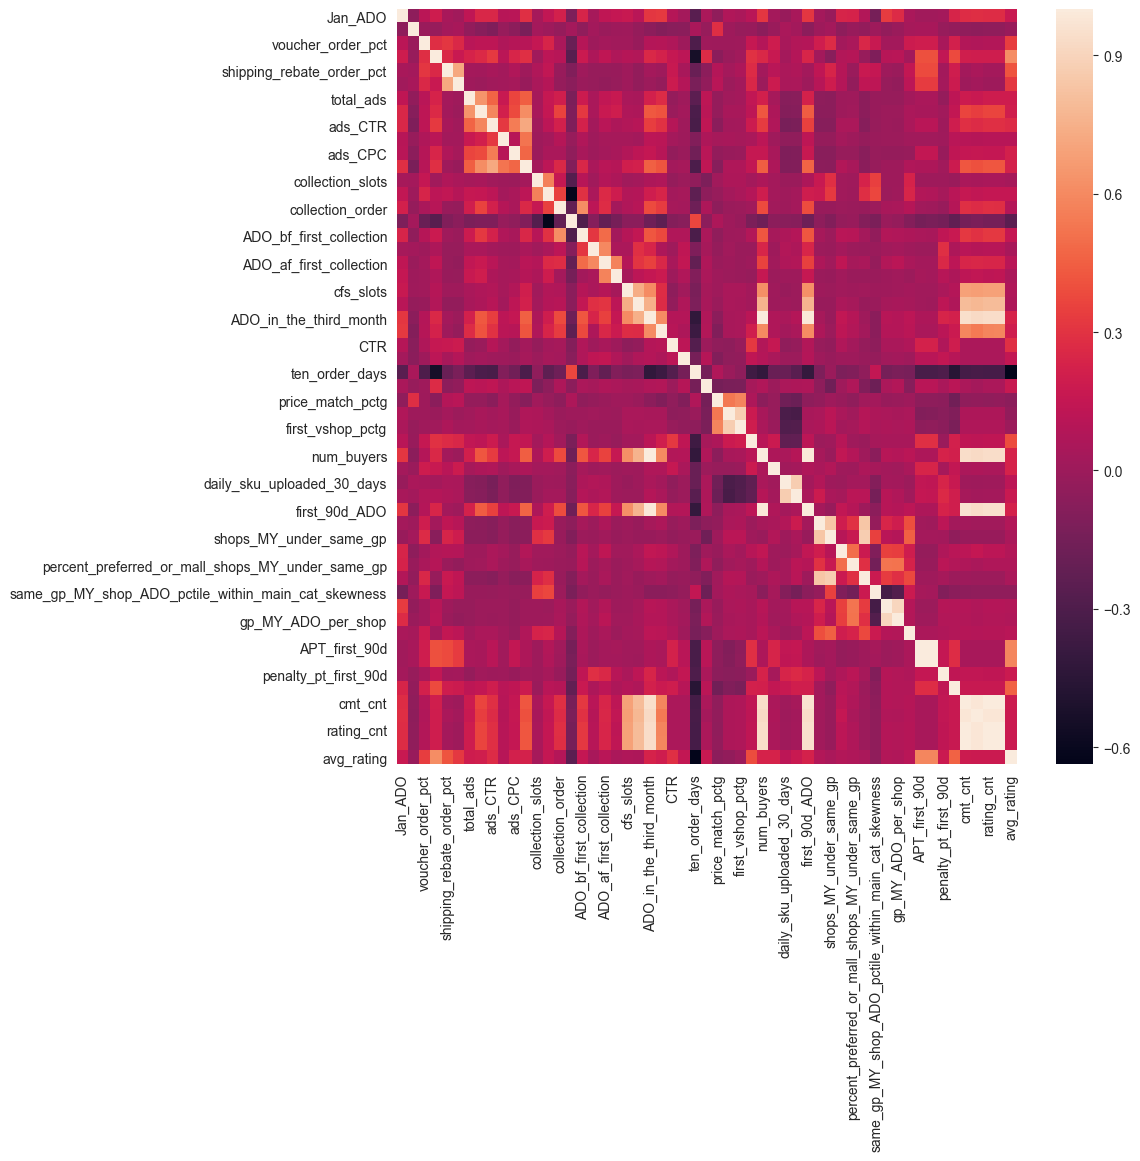

In [140]:
fig = plt.figure(1, figsize=[10, 10], dpi=100)

ax = sns.heatmap(correction)
plt.show()

### Scatter

In [146]:
sub_dataset1 = rawdata_normalized[['Jan_ADO', 'main_category', 'item_rebate_order_pct', 'ads_expen', 'collection_times',
                                  'ADO_in_the_third_month', 'HotSKU_num', 'num_buyers', 'ten_order_days', 'rating_cnt']]
sub_dataset1.head(2)

,Jan_ADO,main_category,item_rebate_order_pct,ads_expen,collection_times,ADO_in_the_third_month,HotSKU_num,num_buyers,ten_order_days,rating_cnt
0,16.134314,0.597303,1.061716,-0.285082,-0.336165,1.517831,0.696785,1.425450,-1.752145,1.623184
1,15.602854,-1.129367,1.061716,0.454115,2.792339,0.122317,6.001017,0.159442,-1.443552,0.793799


Text(0.5, 1.0, 'main_category')

Text(0.5, 1.0, 'item_rebate_order_pct')

Text(0.5, 1.0, 'ads_expen')

Text(0.5, 1.0, 'collection_times')

Text(0.5, 1.0, 'ADO_in_the_third_month')

Text(0.5, 1.0, 'HotSKU_num')

Text(0.5, 1.0, 'num_buyers')

Text(0.5, 1.0, 'ten_order_days')

Text(0.5, 1.0, 'rating_cnt')

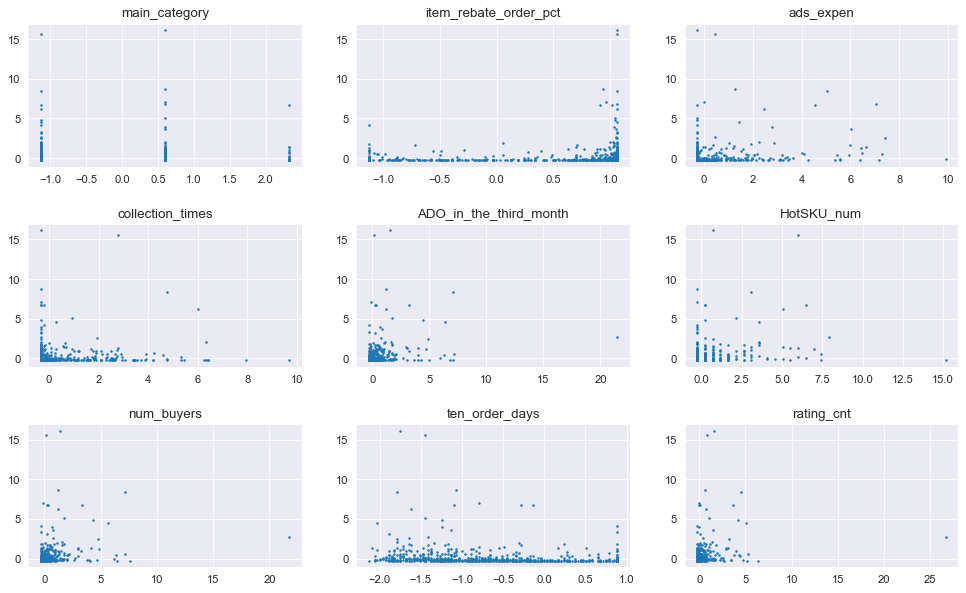

In [148]:
fig = plt.figure(1, figsize=[15, 9], dpi=80)

sub_features1 = sub_dataset1.iloc[:, 1:].columns.to_list()
for _ in range(len(sub_features1)):
    count = _ + 1  
    ax = plt.subplot('33%s' % str(count))
    ax.set_title('%s' % sub_features1[_])
    ax.scatter(sub_dataset1[sub_features1[_]], sub_dataset1.Jan_ADO, s=1.5)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4)
plt.show()

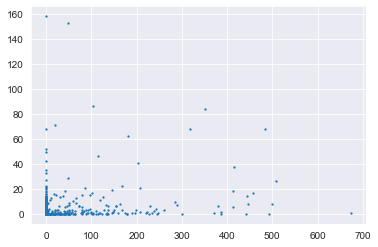

In [154]:
plt.scatter(rawdata['ads_expen'], rawdata.Jan_ADO, s=1.5)

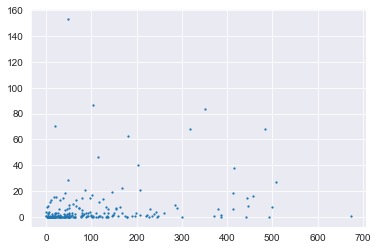

In [161]:
plt.scatter(rawdata[rawdata.ads_expen!= 0].ads_expen, rawdata[rawdata.ads_expen!= 0].Jan_ADO, s=1.5)

## Part VI - Data Visualization - MinMax

In [187]:
rawdata_normalized2.head(3)

,Jan_ADO,main_category,voucher_order_pct,item_rebate_order_pct,shipping_rebate_order_pct,shipping_order_pct,total_ads,ads_expen,ads_CTR,ads_ROI,...,shop_first_90d_ADO_over_GP_MY_ADO_per_shop,APT_first_90d,shop_APT_over_CB_APT,penalty_pt_first_90d,response_rate,cmt_cnt,cmt_img_cnt,rating_cnt,rating_5,avg_rating
0,1.000000,0.5,0.357357,1.00000,0.204204,0.195195,0.000000,0.000000,0.000000,0.000000,...,0.021906,0.154484,0.158174,0.083333,0.96,0.066512,0.042122,0.069454,0.067339,0.985075
1,0.967565,0.0,0.341772,1.00000,0.265823,0.189873,0.037736,0.072522,0.211264,0.000941,...,0.000000,0.187435,0.187291,0.000000,0.98,0.036731,0.034321,0.038701,0.038891,0.994595
2,0.546757,0.5,0.216418,0.94403,0.481343,0.451493,0.119497,0.153256,0.550645,0.081932,...,0.000000,0.225575,0.237480,0.000000,0.99,0.031767,0.037441,0.033172,0.032409,0.985417


In [189]:
sub_dataset2 = rawdata_normalized2[['Jan_ADO', 'main_category', 'item_rebate_order_pct', 'ads_expen', 'collection_times',
                                  'ADO_in_the_third_month', 'HotSKU_num', 'num_buyers', 'ten_order_days', 'rating_cnt']]
sub_dataset2.head(2)

,Jan_ADO,main_category,item_rebate_order_pct,ads_expen,collection_times,ADO_in_the_third_month,HotSKU_num,num_buyers,ten_order_days,rating_cnt
0,1.000000,0.5,1.0,0.000000,0.000000,0.084219,0.06250,0.078999,0.125000,0.069454
1,0.967565,0.0,1.0,0.072522,0.311787,0.020233,0.40625,0.021647,0.227273,0.038701


Text(0.5, 1.0, 'main_category')

Text(0.5, 1.0, 'item_rebate_order_pct')

Text(0.5, 1.0, 'ads_expen')

Text(0.5, 1.0, 'collection_times')

Text(0.5, 1.0, 'ADO_in_the_third_month')

Text(0.5, 1.0, 'HotSKU_num')

Text(0.5, 1.0, 'num_buyers')

Text(0.5, 1.0, 'ten_order_days')

Text(0.5, 1.0, 'rating_cnt')

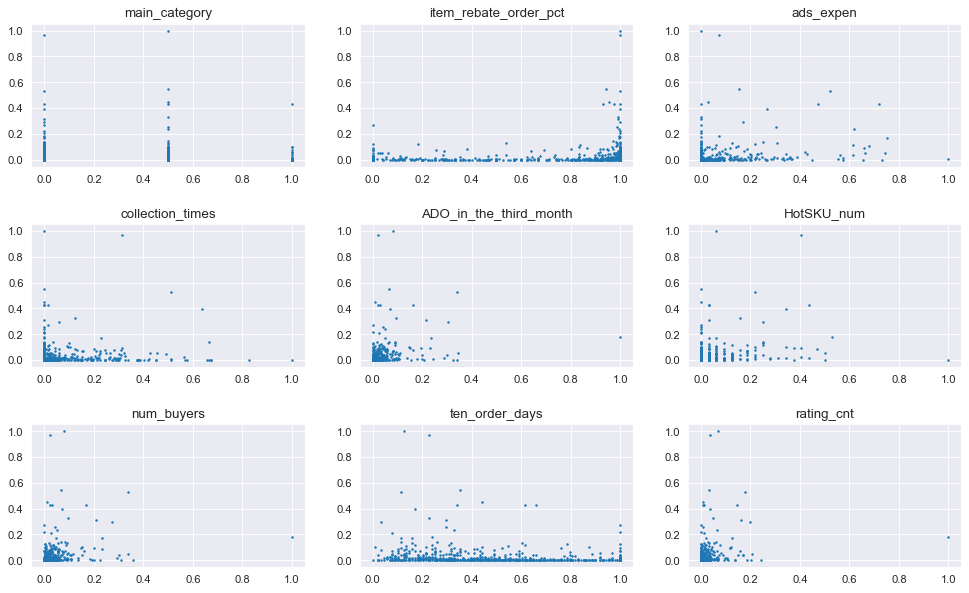

In [190]:
fig = plt.figure(2, figsize=[15, 9], dpi=80)

sub_features2 = sub_dataset2.iloc[:, 1:].columns.to_list()
for _ in range(len(sub_features2)):
    count = _ + 1  
    ax = plt.subplot('33%s' % str(count))
    ax.set_title('%s' % sub_features2[_])
    ax.scatter(sub_dataset2[sub_features2[_]], sub_dataset2.Jan_ADO, s=1.5)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4)
plt.show()